# **Hybrid Model using Random Forest, K-Nearest Neighbors and Artificial Neural Network(ANN) in Credit Card Fraud Detection System**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Dataset Exploration**

## **1.1 Loading the dataset**

In [2]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

## **1.2 Size of the dataset**

In [3]:
print(f"Dataset shape:- \n{data.shape}")

Dataset shape:- 
(284807, 31)


## **1.3 Describing the dataset**

In [4]:
print(data.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


## **1.4 How the dataset looks like**

In [5]:
print(data.head())

   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


## **1.5 List of feature names**

In [6]:
print(f"Data features or columns:- \n{data.columns}")

Data features or columns:- 
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


## **1.6 Plot Histogram of each parameter**

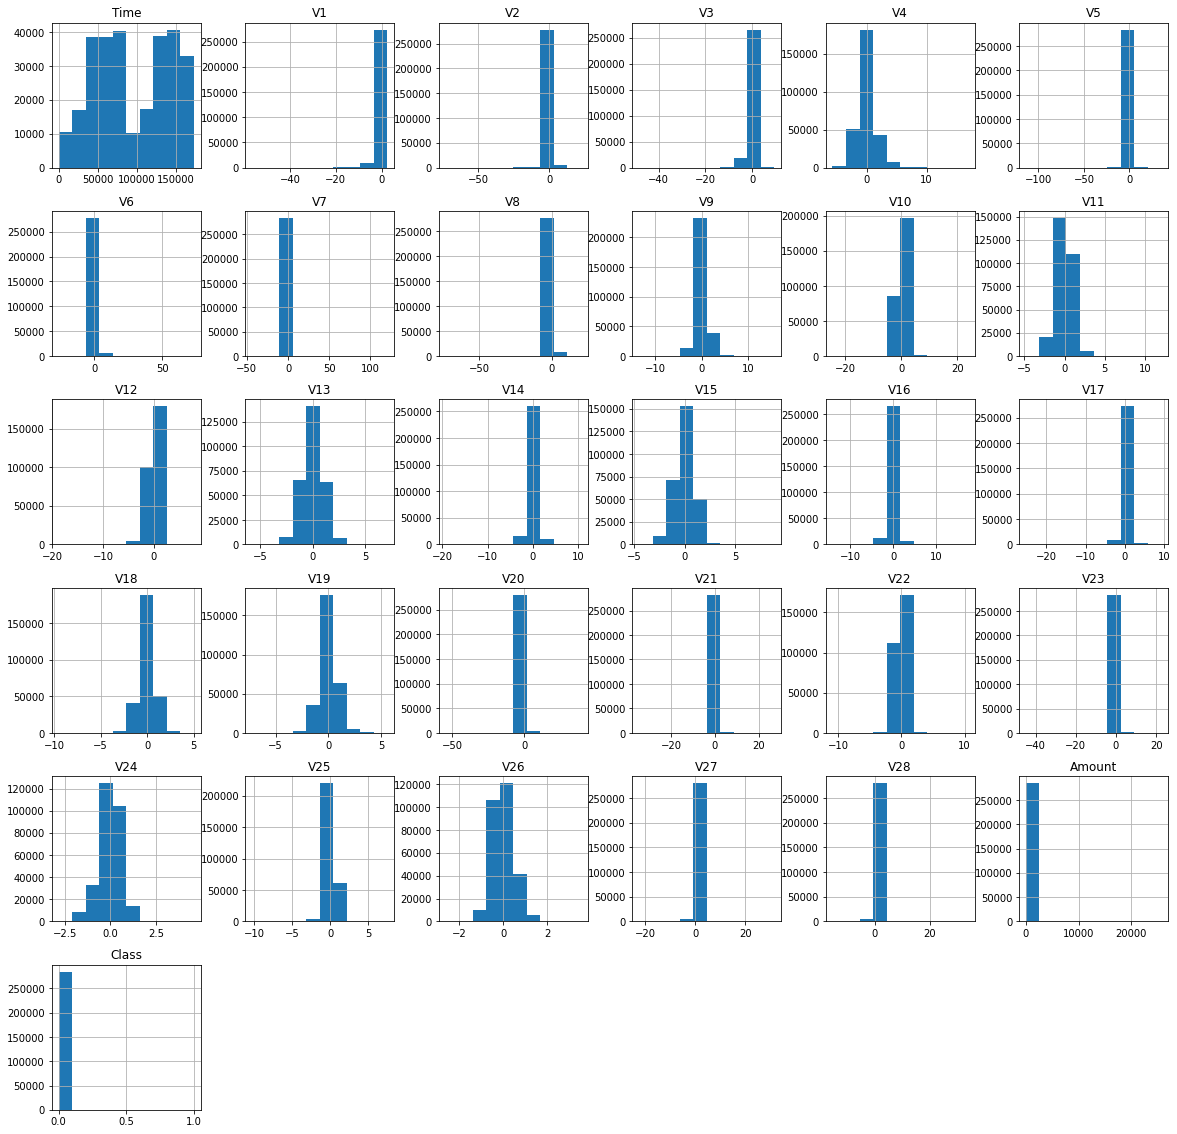

In [7]:
import matplotlib.pyplot as plt

data.hist(figsize = (20, 20))
plt.show()

## **1.7 Correlation matrix**

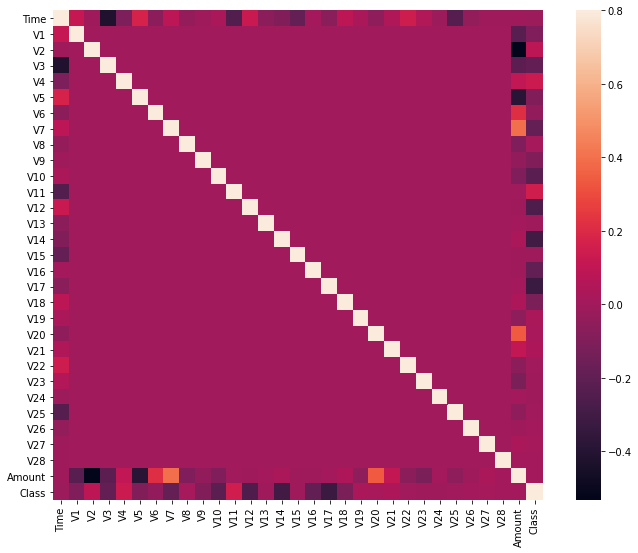

In [8]:
import seaborn as sns

corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

## **1.8 Unique values of target variable**

In [9]:
print(f"Unique values of target variable:- \n{data['Class'].unique()}")
print("0 for legitimate transaction\n1 for fraud transaction")

Unique values of target variable:- 
[0 1]
0 for legitimate transaction
1 for fraud transaction


## **1.9 Number of samples under each target value**

In [10]:
print(f"Number of samples under each target value:- \n{data['Class'].value_counts()}")

Number of samples under each target value:- 
0    284315
1       492
Name: Class, dtype: int64


## **1.10 Imbalance in the data**

In [11]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Transactions: {}'.format(len(valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


## **1.11 Print the amount details of fraudulent transaction**

In [12]:
print('Amount details of the Fraudulent Transaction')
fraud.Amount.describe()

Amount details of the Fraudulent Transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## **1.12 Print the amount details of legitimate transaction**

In [13]:
print('Amount details of the Normal Transaction')
valid.Amount.describe()

Amount details of the Normal Transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# **2. Data Preprocessing**

## **2.1 Removing irrelevant features/columns**

In [14]:
data = data.drop(['Time'], axis = 1)
print(f"List of feature names after removing Time column:- \n{data.columns}")

List of feature names after removing Time column:- 
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


## **2.2 Checking null or nan values**

In [15]:
print("Dataset info:-")
print(data.info())

Dataset info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64


## **2.3 Data transformation**

In [16]:
print(f"Few values of Amount column:- \n{data['Amount'][0:4]}")

Few values of Amount column:- 
0    149.62
1      2.69
2    378.66
3    123.50
Name: Amount, dtype: float64


In [17]:
from sklearn.preprocessing import StandardScaler
data['Norm_Amount'] = StandardScaler().fit_transform(
data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis = 1)
print(f"Few values of Amount column after applying StandardScaler:- \n{data['Norm_Amount'][0:4]}")

Few values of Amount column after applying StandardScaler:- 
0    0.244964
1   -0.342475
2    1.160686
3    0.140534
Name: Norm_Amount, dtype: float64


# **4. Splitting the dataset**

In [18]:
from sklearn.model_selection import train_test_split
X = data.drop(['Class'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364,)
(85443,)


# **5. Random Forest Classifier**

Model training start........


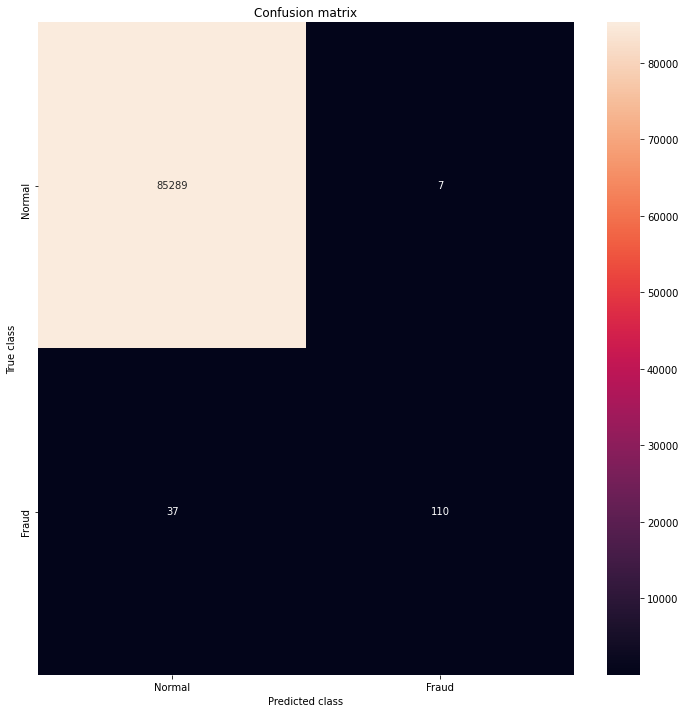

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.75      0.83       147

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

AROC score :- 
 0.8741086262867555


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# initialize object for RandomForestClassifier class
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
print("Model training start........")
rf_classifier.fit(X_train, y_train)
 

 
# predict result using test dataset
y_pred1 = rf_classifier.predict(X_test)



# confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred1)
plt.figure(figsize = (12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()
 
# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test, y_pred1)}")
 
# area under roc curve
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred1)}")
 

# **6. KNN**

Model training start........


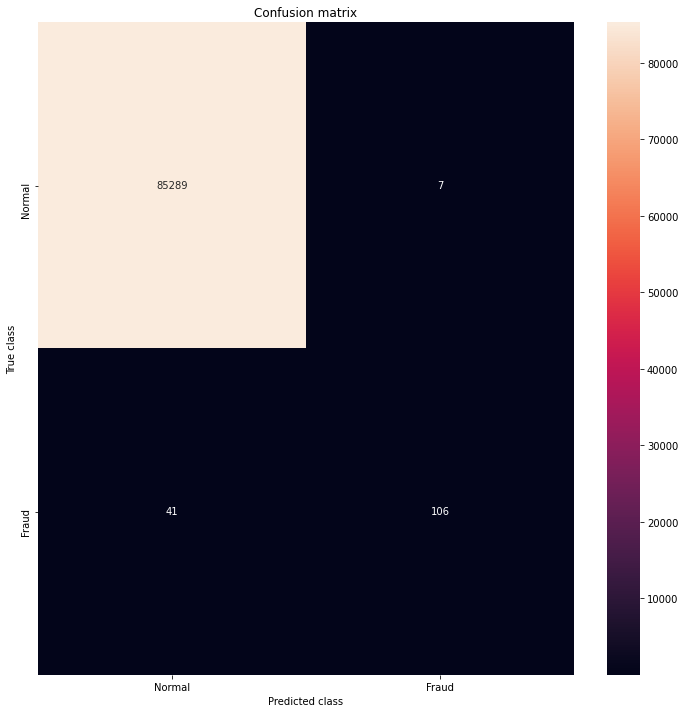

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.72      0.82       147

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

AROC score :- 
 0.8605031841098847


In [20]:
from sklearn.neighbors import KNeighborsClassifier

# initialize object for KNeighborsClassifier class
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
print("Model training start........")
knn_classifier.fit(X_train, y_train)

# predict result using test dataset
y_pred2 = knn_classifier.predict(X_test)



# confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred2)
plt.figure(figsize = (12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()
 
# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test, y_pred2)}")
 
# area under roc curve
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred2)}")


# **7. ANN**

In [24]:
import tensorflow as tf

# Adding layers in ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(input_dim = 29, units=29, activation='relu'))
ann.add(tf.keras.layers.Dense(units=29, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print("Model training start........")
ann.fit(X_train, y_train, batch_size = 15, epochs = 5)

Model training start........
Epoch 1/5
13291/13291 [==============================] - 28s 2ms/step - loss: 0.0072 - accuracy: 0.9986
Epoch 2/5
13291/13291 [==============================] - 28s 2ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 3/5
13291/13291 [==============================] - 27s 2ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 27s 2ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 27s 2ms/step - loss: 0.0023 - accuracy: 0.9994


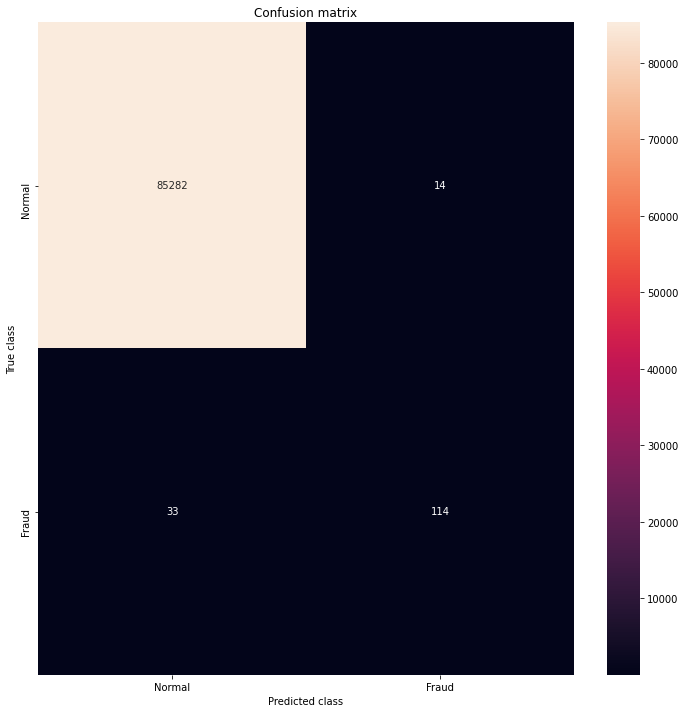

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.78      0.83       147

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

AROC score :- 
 0.8876730348864362


In [25]:
# predict result using test dataset
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.5)



# confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred3)
plt.figure(figsize = (12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test, y_pred3)}")
 
# area under roc curve
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")


# **8. Majority Voting**

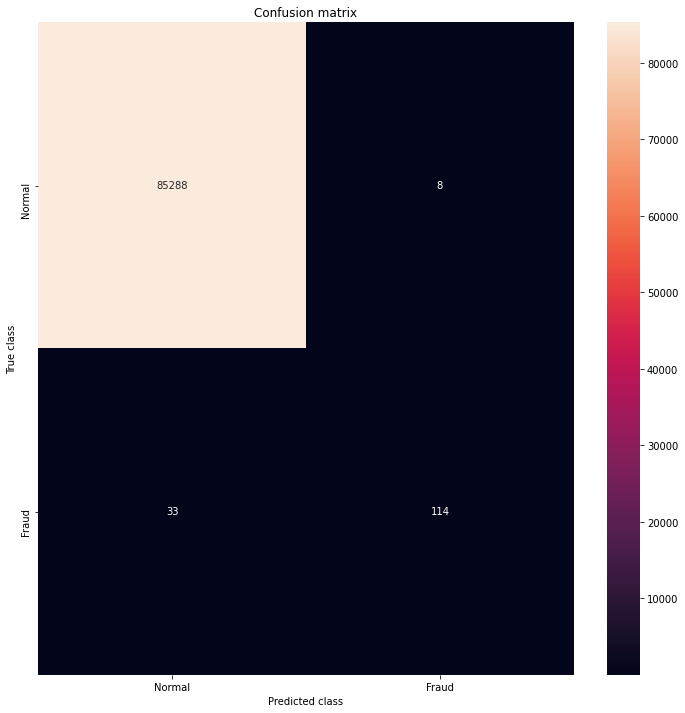

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.78      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

AROC score :- 
 0.8877082065240277


In [26]:
import numpy as np

res = np.concatenate((y_pred1.reshape(len(y_pred1),1), y_pred2.reshape(len(y_pred2),1), y_pred3.reshape(len(y_pred3), 1)),1)
list1 = []
for i in range(len(res)):
  c1=0
  c2=0
  for j in range(len(res[i])):
    
    if(res[i][j] == 1):
      c1=c1+1;
    else:
      c2=c2+1;
    
  if(c1>c2):
    list1.append(1)
      
    
  else:
    list1.append(0)



# confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, list1)
plt.figure(figsize = (12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()


# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test, list1)}")
 
# area under roc curve
print(f"AROC score :- \n {roc_auc_score(y_test, list1)}")